# __WeatherPy__

---

###### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they help you think through the steps

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import requests 
import json
import time
import scipy
import scipy.stats
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output FILE (CSV)
output_data_file = '../Resources/cities.csv'

# Range of latitudes and longitues
lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Inclue a print log of each city as it's being processed (with city number and city name)

In [8]:
# Set user url links
url_end = '&APPID=' + api_key
url_base = 'http://api.openweathermap.org/data/2.5/weather?q='

data = {}

#loop through cities, check to see if city not in weather API
print('Beginning Data Retrieval')
print('-------------------------')
counter = 0
for city in cities:
    print('Processing Record ' + str(counter) + '| ' + city)
    url = url_base + city + url_end
    response = requests.get(url).json()
    if response['cod'] == '404':
        print(response['message'].title() + '. Skipping...')
    else:
        data[counter] = response
    counter += 1
print('-------------------------')    
print('Data Retrieval Complete')
print('-------------------------')


Beginning Data Retrieval
-------------------------
Processing Record 0| Ushuaia
Processing Record 1| Olinala
Processing Record 2| Rikitea
Processing Record 3| Hermanus
Processing Record 4| Port Elizabeth
Processing Record 5| Jamestown
Processing Record 6| Verkhnyaya Balkariya
Processing Record 7| Punta Arenas
Processing Record 8| Matata
Processing Record 9| Pevek
Processing Record 10| Norman Wells
Processing Record 11| Busselton
Processing Record 12| Bredasdorp
Processing Record 13| Dikson
Processing Record 14| Saint George
Processing Record 15| Albany
Processing Record 16| Iraray
Processing Record 17| Kapaa
Processing Record 18| Codrington
Processing Record 19| Upernavik
Processing Record 20| Qaanaaq
Processing Record 21| Korla
City Not Found. Skipping...
Processing Record 22| Belushya Guba
City Not Found. Skipping...
Processing Record 23| Griffith
Processing Record 24| Port Orange
Processing Record 25| Kaliua
Processing Record 26| Cape Town
Processing Record 27| Avarua
Processing Rec

Processing Record 236| Vostok
Processing Record 237| South Lake Tahoe
Processing Record 238| Muromtsevo
Processing Record 239| Marcona
City Not Found. Skipping...
Processing Record 240| Long Xuyen
Processing Record 241| Komsomolskiy
Processing Record 242| Manado
Processing Record 243| Leningradskaya
Processing Record 244| Saveh
Processing Record 245| Port Alfred
Processing Record 246| Mandalgovi
Processing Record 247| Celestun
Processing Record 248| Shimoda
Processing Record 249| Hobart
Processing Record 250| Geraldton
Processing Record 251| Matagami
Processing Record 252| Armacao Dos Buzios
City Not Found. Skipping...
Processing Record 253| Lolua
City Not Found. Skipping...
Processing Record 254| Karratha
Processing Record 255| Ongandjera
Processing Record 256| Yulara
Processing Record 257| Chuy
Processing Record 258| Buta
Processing Record 259| Ixchiguan
Processing Record 260| Ilulissat
Processing Record 261| Nikel
Processing Record 262| Pareora
Processing Record 263| Kottagudem
Proc

Processing Record 469| Maturin
Processing Record 470| Abohar
Processing Record 471| Awjilah
Processing Record 472| Paracuru
Processing Record 473| Strezhevoy
Processing Record 474| Naftah
City Not Found. Skipping...
Processing Record 475| Cockburn Town
Processing Record 476| Oksfjord
Processing Record 477| Fort Nelson
Processing Record 478| Bulgan
Processing Record 479| Edgewater
Processing Record 480| Nam Tha
City Not Found. Skipping...
Processing Record 481| Farah
Processing Record 482| Maragogi
Processing Record 483| Ayan
Processing Record 484| Dutlwe
Processing Record 485| Toliary
City Not Found. Skipping...
Processing Record 486| Burica
City Not Found. Skipping...
Processing Record 487| Pemba
Processing Record 488| Santa Cruz
Processing Record 489| Pronsk
Processing Record 490| Novomykolayivka
Processing Record 491| Wodonga
Processing Record 492| Amasya
Processing Record 493| Mineros
Processing Record 494| Burkhala
City Not Found. Skipping...
Processing Record 495| Nizhnyaya Poyma

In [23]:
# Data Munging to create Cities DF
cities_df = pd.DataFrame(data)
cities_df = cities_df.transpose()

# Extract values in certain columns
cities_df['clouds'] = cities_df['clouds'].apply(lambda x: x.get('all'))
cities_df['latitude'] = cities_df['coord'].apply(lambda x: x.get('lat'))
cities_df['longitude'] = cities_df['coord'].apply(lambda x: x.get('lon'))
cities_df['temp'] = cities_df['main'].apply(lambda x: x.get('temp'))
cities_df['country'] = cities_df['sys'].apply(lambda x: x.get('country'))
cities_df['date'] = cities_df['dt'].apply(lambda x: time.strftime("%D %H:%M", time.localtime(int(x))))
cities_df['humidity'] = cities_df['main'].apply(lambda x: x.get('humidity'))
cities_df['wind speed'] = cities_df['wind'].apply(lambda x: x.get('speed'))

# Change temp to Fahrenheit
cities_df['temp'] = cities_df['temp'].apply(lambda x: ((x - 273.15) * 9/5 + 32))
# Change column names
cities_df = cities_df.rename(columns={'name':'city', 'clouds':'cloudiness'})

# Data Munging to only keep wanted columns
cols = list(cities_df.columns.values)
cols = ['city','country','id','date','latitude','longitude','temp','cloudiness','wind speed','humidity']
cities_df = cities_df[cols]

# Save Data to html
cities_df.to_html('data.html')

cities_df.head()

,city,country,id,date,latitude,longitude,temp,cloudiness,wind speed,humidity
0,Ushuaia,AR,3833367,10/30/19 15:30,-54.81,-68.31,53.600,75,6.70,37
1,Olinala,MX,3522364,10/30/19 15:32,17.83,-98.85,81.518,0,0.85,59
2,Rikitea,PF,4030556,10/30/19 15:30,-23.12,-134.97,71.312,65,2.98,73
3,Hermanus,ZA,3366880,10/30/19 15:30,-34.42,19.24,57.002,0,4.92,74
4,Port Elizabeth,US,4501427,10/30/19 15:30,39.31,-74.98,64.598,90,1.26,93


### Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis and axes labels.
- Save the plotted figures as .pngs 
---

#### Latitude vs. Temperature Plot

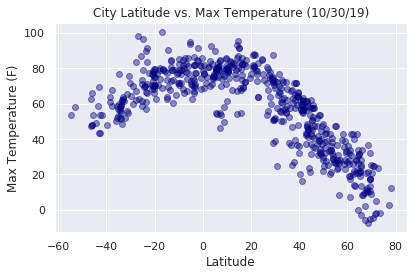

In [13]:
x = cities_df['latitude']
y = cities_df['temp']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.43)
plt.grid(True)
plt.title('City Latitude vs. Max Temperature ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
# Save Figure
plt.savefig('../Resources/MaxTempvsLat.png')
# Show Figure
plt.show()



#### Latitude vs. Humidity Plot

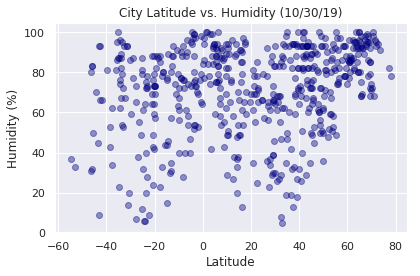

In [19]:
x = cities_df['latitude']
y = cities_df['humidity']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.4)
plt.grid(True)
plt.title('City Latitude vs. Humidity ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
# Save Figure
plt.savefig('../Resources/HumidityvsLat.png')
# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

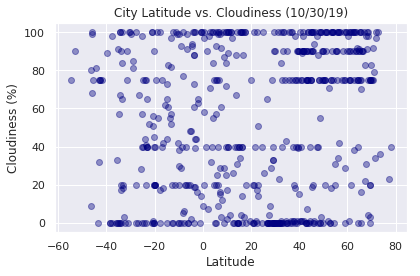

In [20]:
x = cities_df['latitude']
y = cities_df['cloudiness']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.4)
plt.grid(True)
plt.title('City Latitude vs. Cloudiness ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
# Save Figure
plt.savefig('../Resources/CloudinessvsLat.png')
# Show Plot
plt.show()

#### Latitude vs. Wind Speed

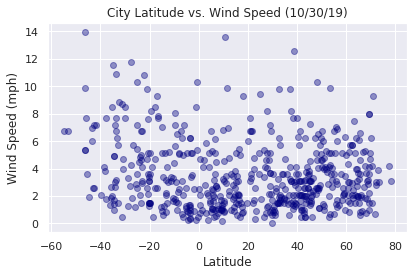

In [21]:
x = cities_df['latitude']
y = cities_df['wind speed']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.4)
plt.grid(True)
plt.title('City Latitude vs. Wind Speed ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
# Save Figure
plt.savefig('../Resources/WindSpeedvsLat.png')
# Show Plot
plt.show()

## Linear Regression

In [87]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regress(x,y):
    vals = scipy.stats.linregress(x, y)
    return vals

In [88]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = cities_df.query('latitude > 0')
south_hemi = cities_df.query('latitude < 0')

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7839061587465824


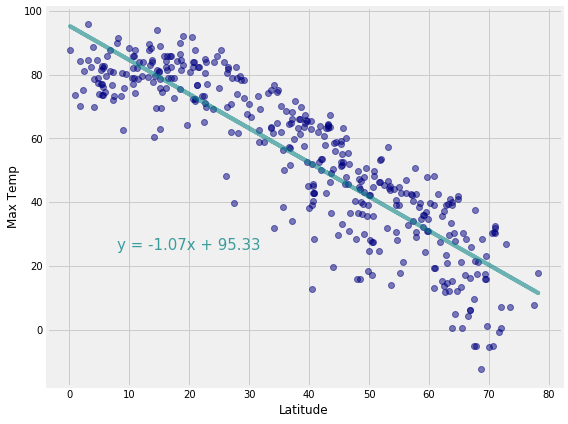

In [104]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['temp']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', alpha=.5, color='navy')
plt.plot(x, intercept + slope*x, color='teal', label='fitted line', alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line, xy=(8,25), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41768533107913114


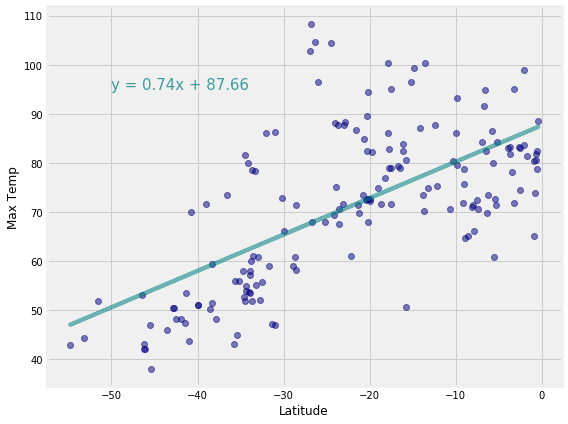

In [106]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['temp']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line, xy=(-50,95), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04786814912071406


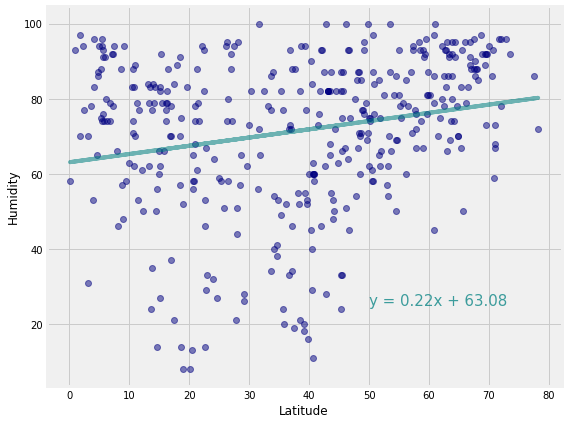

In [111]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['humidity']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line, xy=(50,25), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 3.7094893364368126e-05


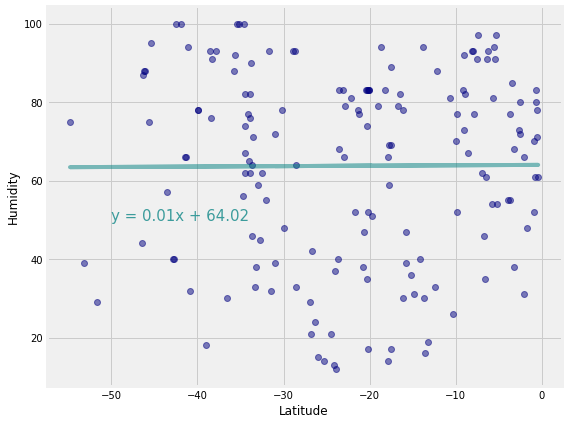

In [117]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['humidity']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy', alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line', alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line, xy=(-50,50), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009546804856808535


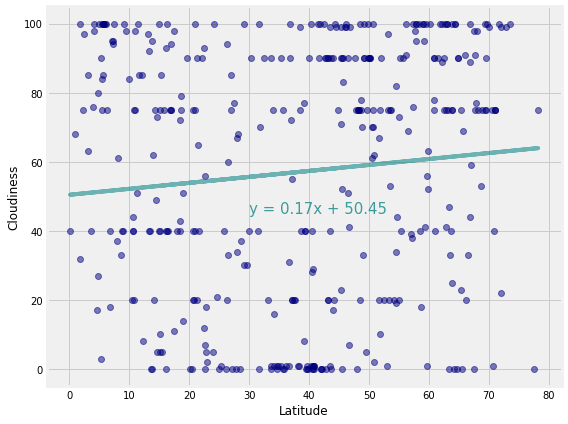

In [122]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['cloudiness']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy', alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line', alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line, xy=(30,45), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0004904983417999949


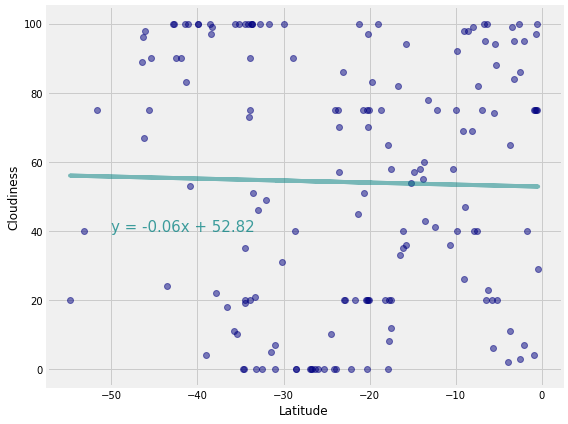

In [130]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['cloudiness']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line, xy=(-50,40), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.054341906820955396


[]

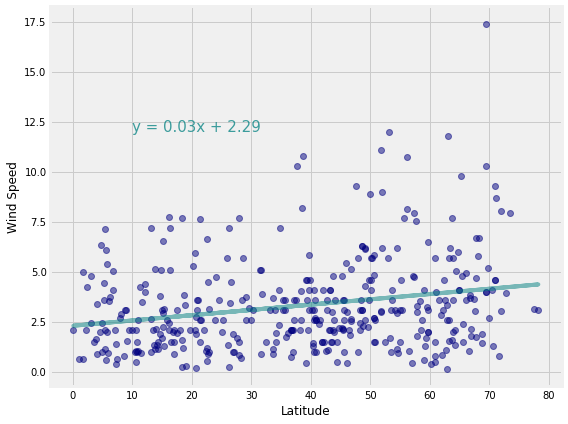

In [132]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['wind speed']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy', alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line, xy=(10,12), color='teal', size=15,alpha=.75)
plt.tight_layout()
# Show Plot
plt.plot()

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03633584152044614


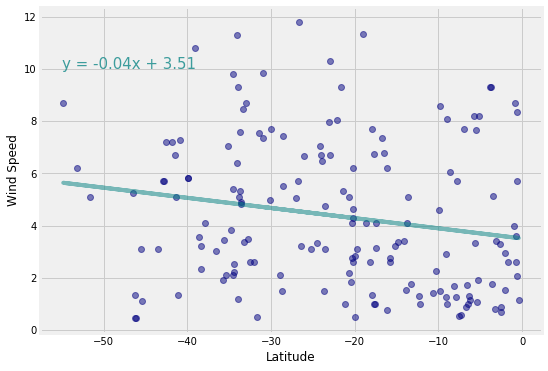

In [135]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['wind speed']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line, xy=(-55,10), color='teal', size=15, alpha=.75)
# Show Plot
plt.show()

In [136]:
save_file = cities_df.to_csv(output_data_file)

## Observable Trends
- Temperature is affected by latitude (closer to equator, greater temp)
- Linear Regression trends were almost non existent for any Humidity/Wind Speed/Cloudiness for latitude on either Hemisphere
- Largest spread of values among the value types is Cloudiness
